In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import holidays

In [2]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


C:\Users\hanam\AppData\Local\Temp\ipykernel_20084\245227638.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


In [5]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


### Adding holidays features,weekend and moving_avg 

In [6]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

In [7]:
df['moving_avg_3h'] = df['Power demand'].rolling(window=3, min_periods=1).mean()
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,moving_avg_3h
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0,0,11853.250000
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0,0,16760.165000
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0,0,17837.100000
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0,0,20315.343333
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0,0,19799.096667


### Data visulization

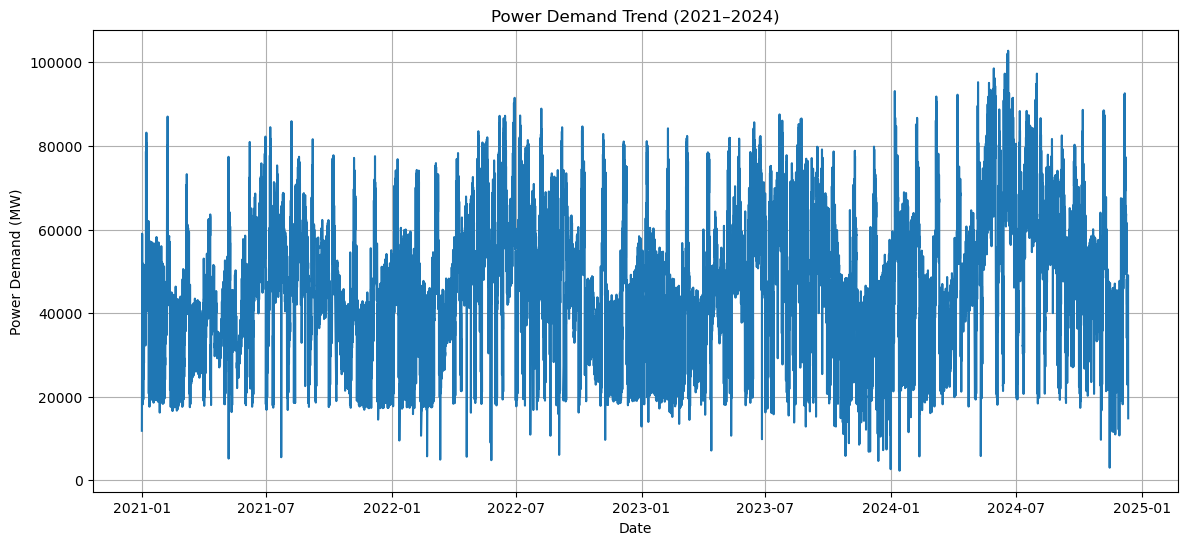

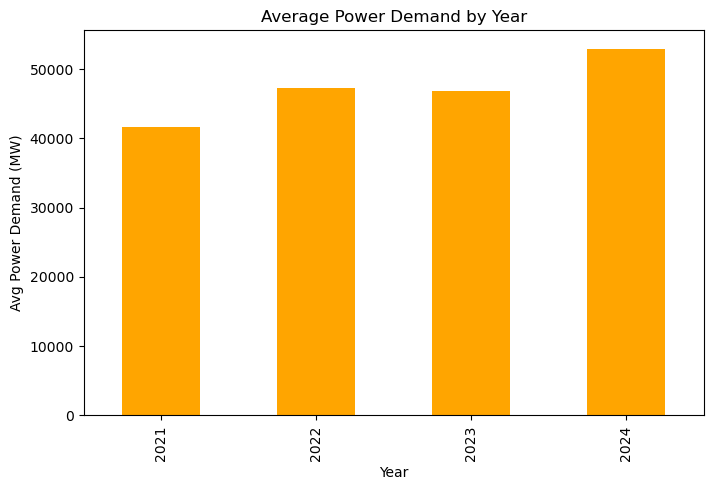

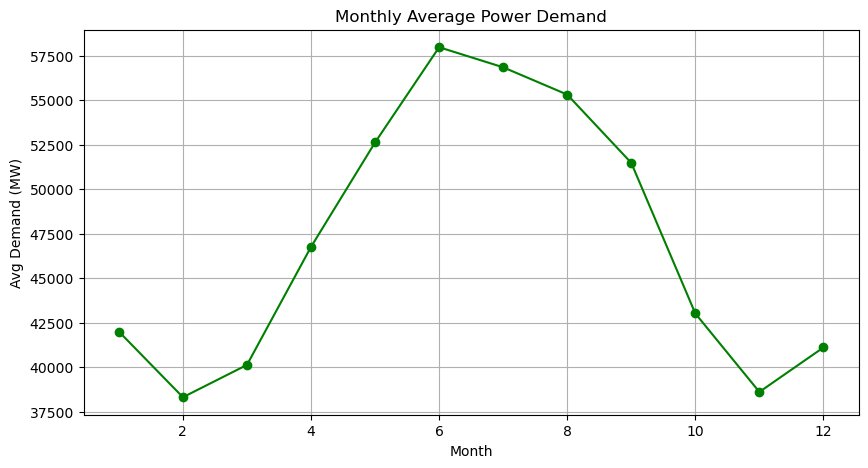

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df['datetime'], df['Power demand'], color='tab:blue')
plt.title("Power Demand Trend (2021–2024)")
plt.xlabel("Date")
plt.ylabel("Power Demand (MW)")
plt.grid(True)
plt.show()

yearly = df.groupby('year')['Power demand'].mean()
yearly.plot(kind='bar', color='orange', figsize=(8,5))
plt.title("Average Power Demand by Year")
plt.ylabel("Avg Power Demand (MW)")
plt.xlabel("Year")
plt.show()

monthly = df.groupby('month')['Power demand'].mean()
monthly.plot(kind='line', marker='o', figsize=(10,5), color='green')
plt.title("Monthly Average Power Demand")
plt.xlabel("Month")
plt.ylabel("Avg Demand (MW)")
plt.grid(True)
plt.show()




In [9]:
df.groupby('year')['Power demand'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2021,8294.0,41673.416883,13118.303984,5203.01,33249.3025,40317.135,50383.905,87029.85
2022,8198.0,47277.108346,15307.716152,4819.49,36899.9925,46722.440,58461.350,91513.36
2023,8643.0,46792.225254,15077.680944,2667.26,37088.7800,45541.690,57872.205,87547.64
2024,7939.0,52987.769199,16990.332900,2297.49,41073.0350,52451.010,65387.030,102781.62


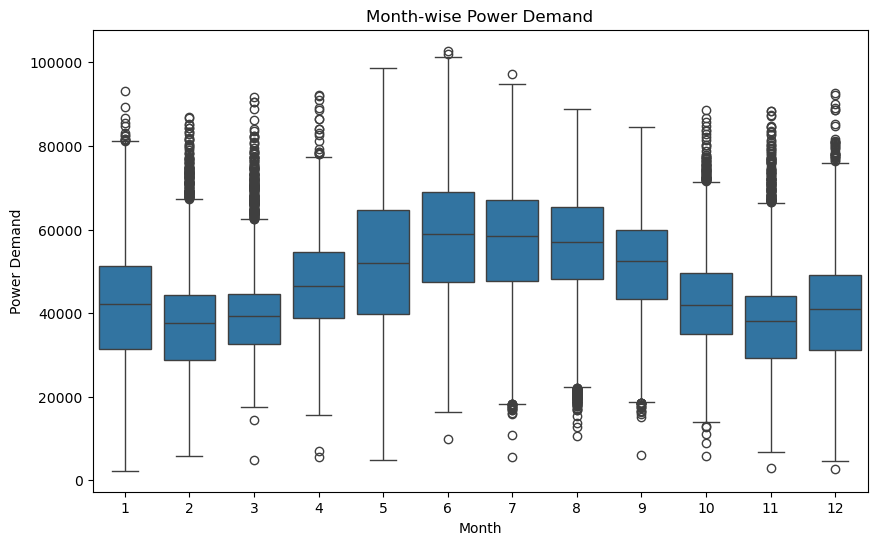

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['month'], y=df['Power demand'])
plt.xlabel("Month")
plt.ylabel("Power Demand")
plt.title("Month-wise Power Demand")
plt.show()

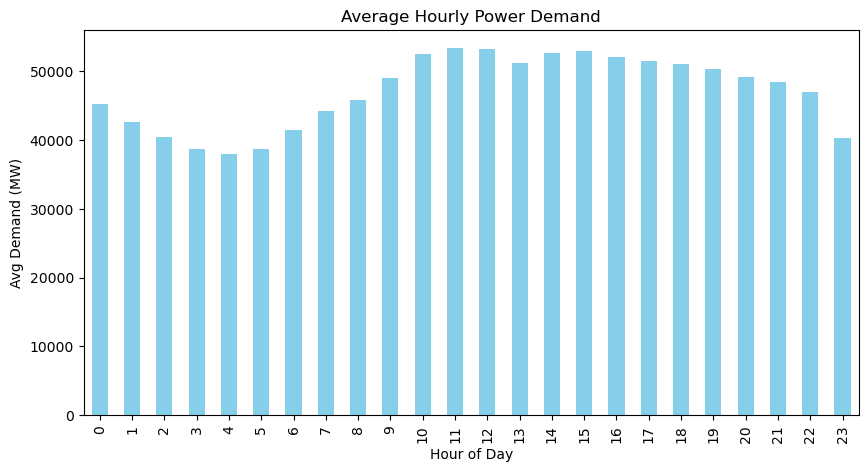

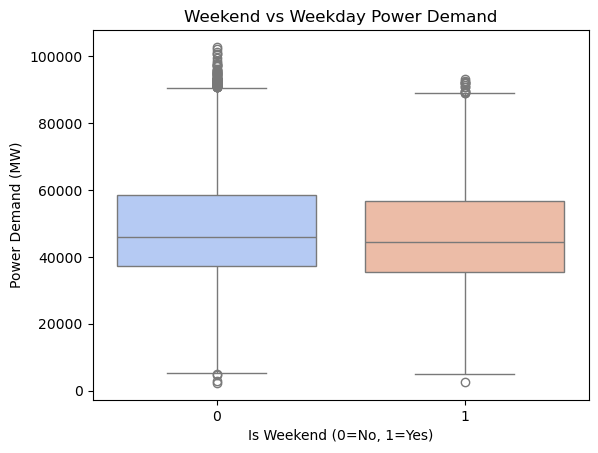

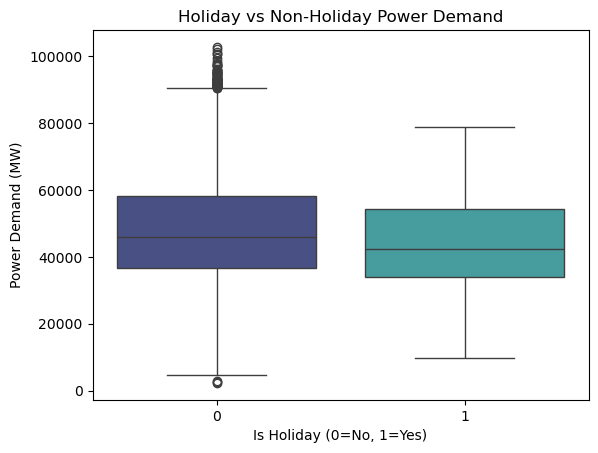

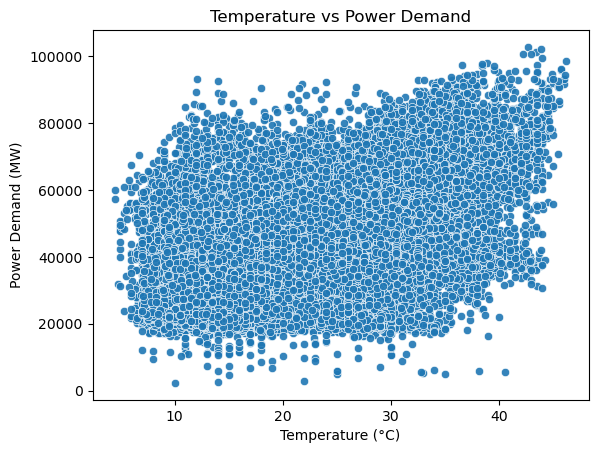

In [11]:
df['hour'] = df['datetime'].dt.hour
hourly = df.groupby('hour')['Power demand'].mean()
hourly.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Average Hourly Power Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Demand (MW)")
plt.show()

sns.boxplot(x='is_weekend', y='Power demand', data=df, hue='is_weekend', palette='coolwarm', legend=False)
plt.title("Weekend vs Weekday Power Demand")
plt.xlabel("Is Weekend (0=No, 1=Yes)")
plt.ylabel("Power Demand (MW)")
plt.show()

sns.boxplot(x='is_holiday', y='Power demand', data=df, hue='is_holiday', palette='mako', legend=False)
plt.title("Holiday vs Non-Holiday Power Demand")
plt.xlabel("Is Holiday (0=No, 1=Yes)")
plt.ylabel("Power Demand (MW)")
plt.show()

sns.scatterplot(x='temp', y='Power demand', data=df, alpha=0.9)
plt.title("Temperature vs Power Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Demand (MW)")
plt.show()



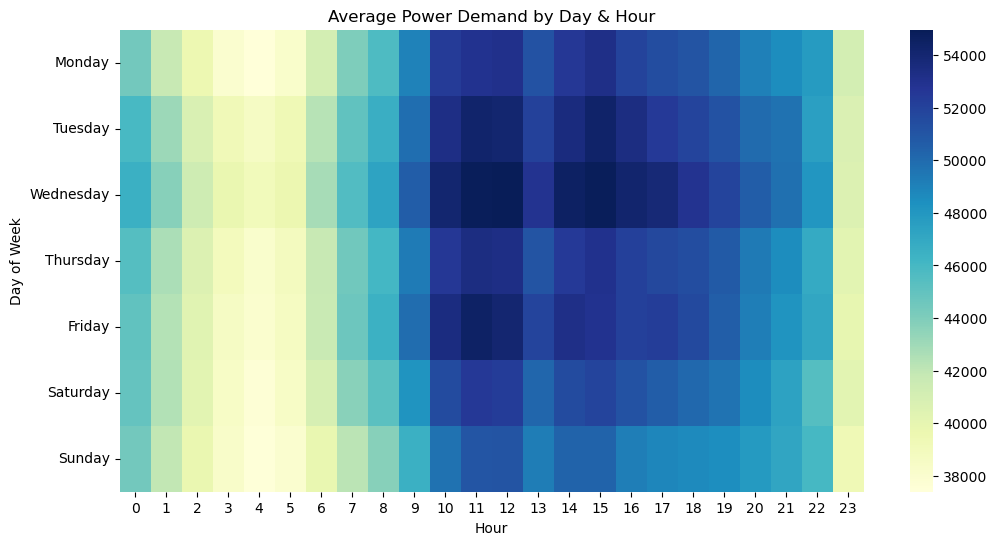

In [12]:
df['day_of_week'] = df['datetime'].dt.day_name()
pivot = df.pivot_table(index='day_of_week', columns='hour', values='Power demand', aggfunc='mean')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Average Power Demand by Day & Hour")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.show()


In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()

full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

df = df.reindex(full_range)
df.index.name = 'datetime'

print(f"Total missing timestamps filled as NaN: {df.isna().any(axis=1).sum()}")

# df.drop(columns=['day_of_week','hour'], inplace=True)
df.head()
df.shape


Total missing timestamps filled as NaN: 1511


C:\Users\hanam\AppData\Local\Temp\ipykernel_20084\1764641608.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


(34585, 11)

### filling the missing values

In [14]:

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Create mask for rows where 'year' is missing (indicates missing derived fields)
mask = df['year'].isna()

# Assign only for the rows where mask is True
df.loc[mask, 'year'] = df.index.to_series()[mask].dt.year
df.loc[mask, 'month'] = df.index.to_series()[mask].dt.month
df.loc[mask, 'date'] = df.index.to_series()[mask].dt.day

print(df.shape)
df.isnull().sum()


(34585, 11)


Power demand     1511
temp             1511
year                0
month               0
date                0
day              1511
is_weekend       1511
is_holiday       1511
moving_avg_3h    1511
hour             1511
day_of_week      1511
dtype: int64

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Power demand', 'temp', 'day','is_weekend','moving_avg_3h','is_holiday']] = imputer.fit_transform(df[['Power demand', 'temp', 'day','is_weekend','moving_avg_3h','is_holiday']])
df.isnull().sum()

Power demand        0
temp                0
year                0
month               0
date                0
day                 0
is_weekend          0
is_holiday          0
moving_avg_3h       0
hour             1511
day_of_week      1511
dtype: int64

### Outlier detection and handling

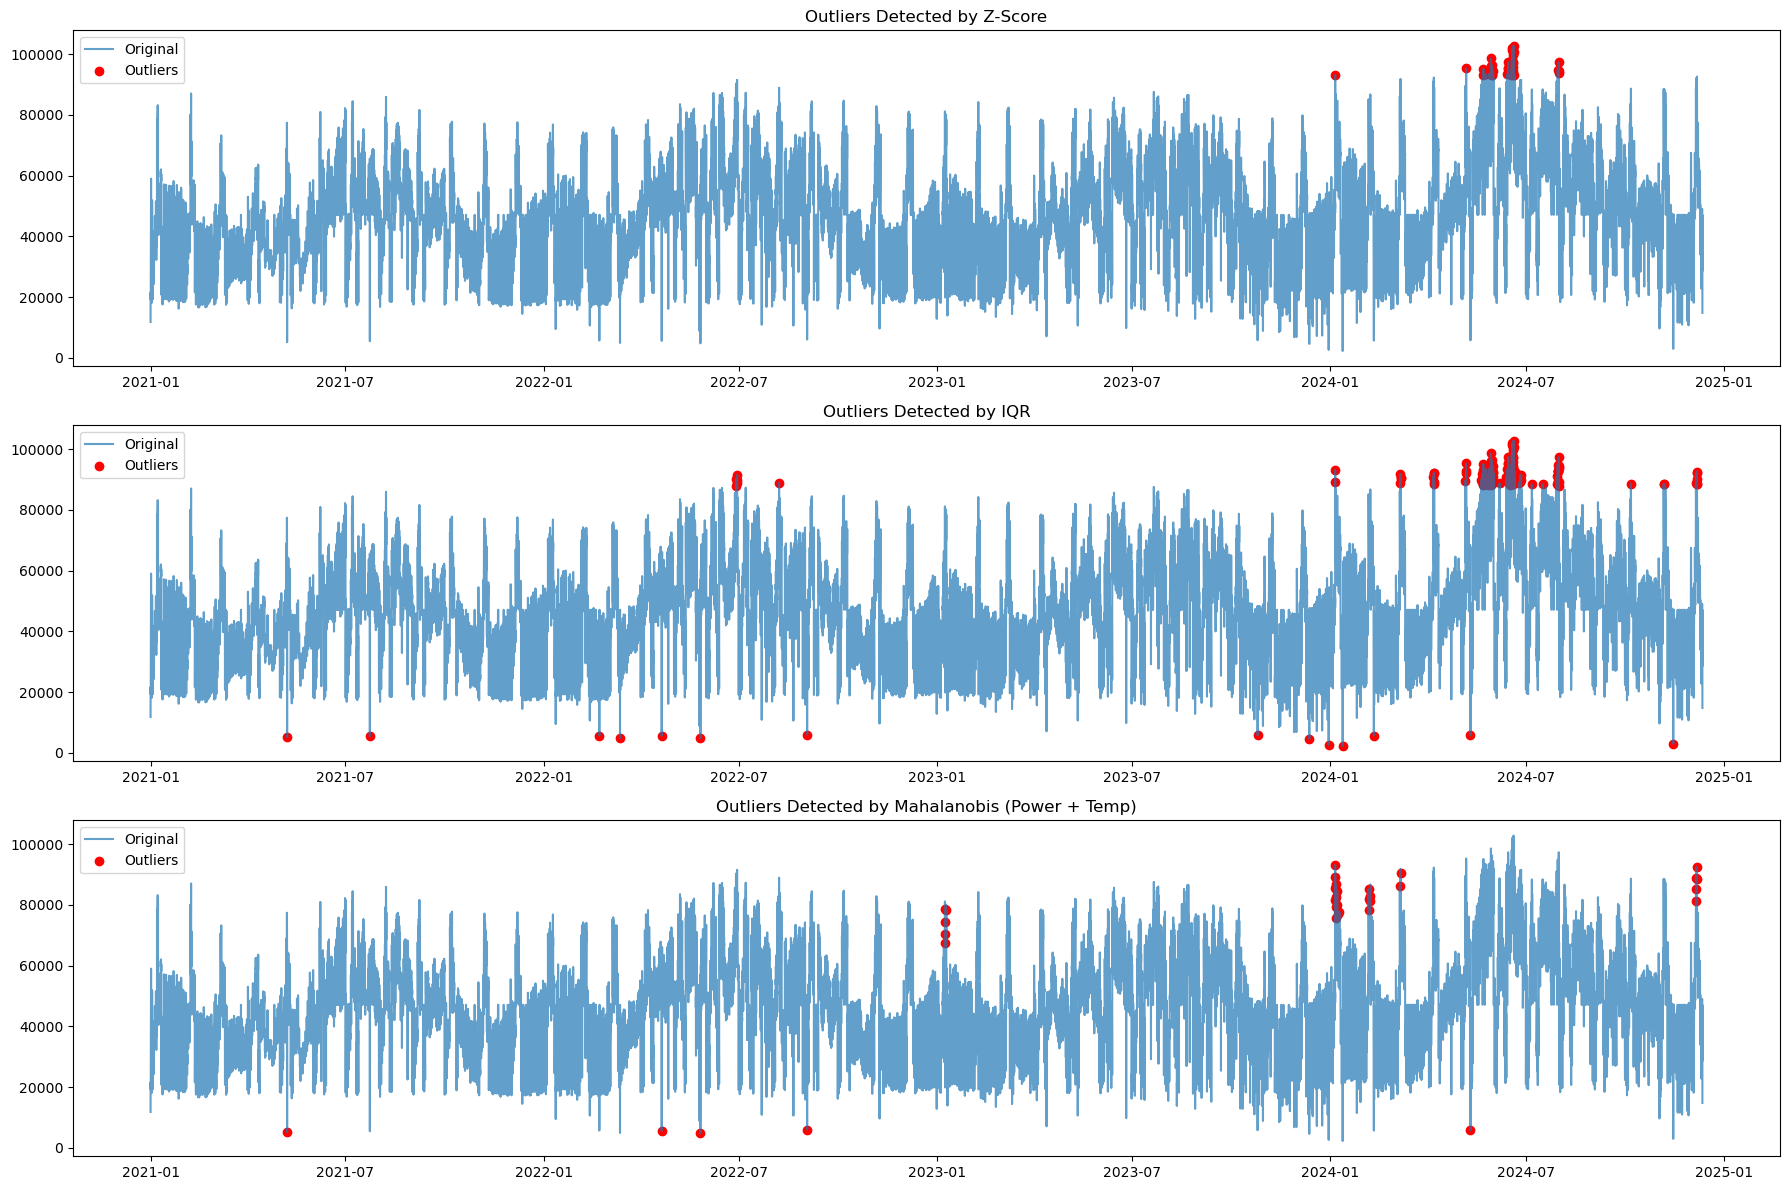

In [16]:
from scipy.stats import zscore, chi2
from scipy.spatial.distance import mahalanobis

# Copy original
df_original = df.copy()

# --- 1. Z-Score Method ---
df['z_score'] = zscore(df['Power demand'])
z_threshold = 3
df['outlier_z'] = np.abs(df['z_score']) > z_threshold

# --- 2. IQR Method ---
Q1 = df['Power demand'].quantile(0.25)
Q3 = df['Power demand'].quantile(0.75)
IQR = Q3 - Q1
df['outlier_iqr'] = ((df['Power demand'] < (Q1 - 1.5 * IQR)) | 
                     (df['Power demand'] > (Q3 + 1.5 * IQR)))

# --- 3. Mahalanobis Distance ---
features = df[['Power demand','temp']].values
mean_vec = np.mean(features, axis=0)
cov_matrix = np.cov(features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
md = np.array([mahalanobis(x, mean_vec, inv_cov_matrix) for x in features])
df['mahalanobis'] = md
threshold = chi2.ppf(0.999, df=features.shape[1])
df['outlier_mahalanobis'] = df['mahalanobis'] > np.sqrt(threshold)

# --- Visualization ---
plt.figure(figsize=(18, 12))

# Z-Score plot
plt.subplot(3,1,1)
plt.plot(df_original.index, df_original['Power demand'], label='Original', alpha=0.7)
plt.scatter(df.index[df['outlier_z']], df_original['Power demand'][df['outlier_z']], color='red', label='Outliers')
plt.title("Outliers Detected by Z-Score")
plt.legend()

# IQR plot
plt.subplot(3,1,2)
plt.plot(df_original.index, df_original['Power demand'], label='Original', alpha=0.7)
plt.scatter(df.index[df['outlier_iqr']], df_original['Power demand'][df['outlier_iqr']], color='red', label='Outliers')
plt.title("Outliers Detected by IQR")
plt.legend()

# Mahalanobis plot
plt.subplot(3,1,3)
plt.plot(df_original.index, df_original['Power demand'], label='Original', alpha=0.7)
plt.scatter(df.index[df['outlier_mahalanobis']], df_original['Power demand'][df['outlier_mahalanobis']], color='red', label='Outliers')
plt.title("Outliers Detected by Mahalanobis (Power + Temp)")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
import numpy as np

features = df[['Power demand','temp']].values
mean_vec = np.mean(features, axis=0)
cov_matrix = np.cov(features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
df['mahalanobis'] = [mahalanobis(x, mean_vec, inv_cov_matrix) for x in features]


alpha = 0.001 
df['outlier_mahalanobis'] = df['mahalanobis'] > np.sqrt(chi2.ppf(1 - alpha, features.shape[1]))

df['Power demand'] = df['Power demand'].mask(
    df['outlier_mahalanobis'],
    df['Power demand'].rolling(3, min_periods=1).mean()
)


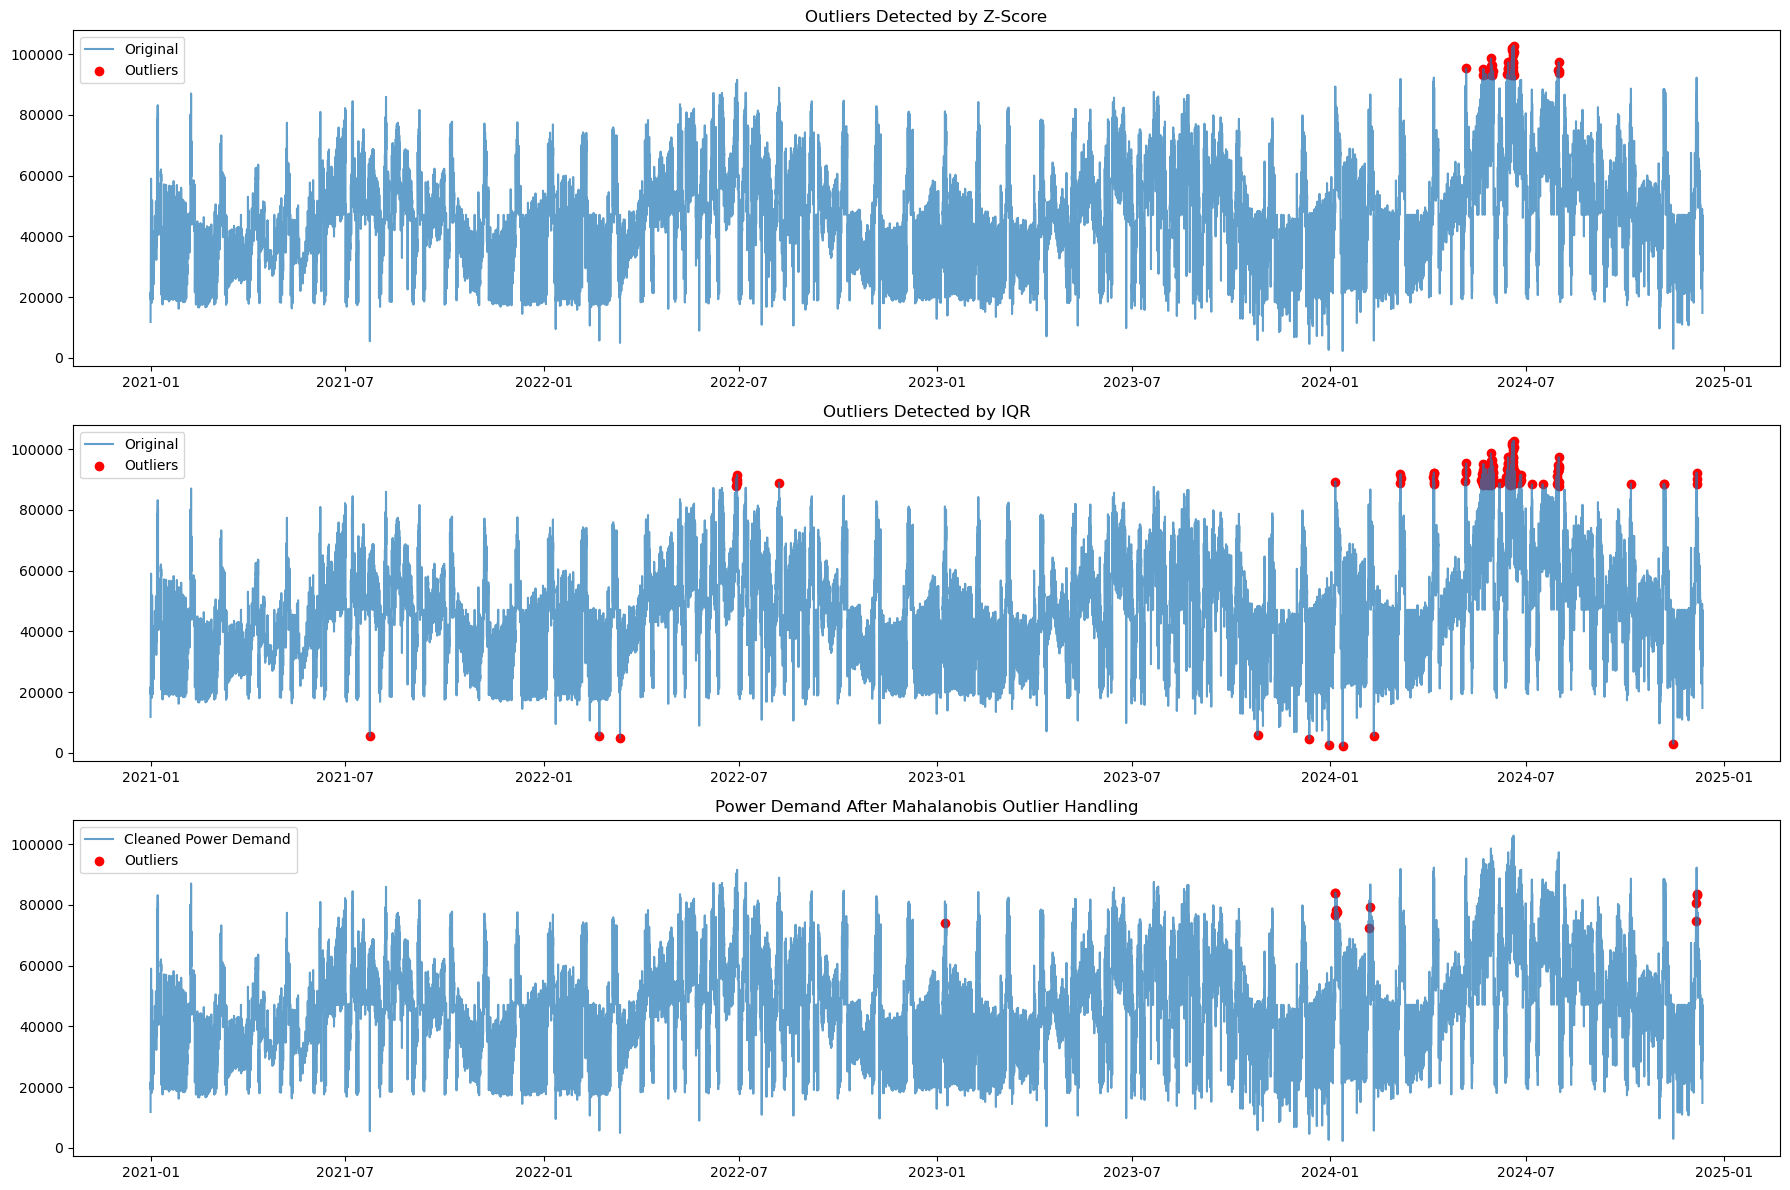

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import zscore, chi2
from scipy.spatial.distance import mahalanobis
import numpy as np

# Copy original for plotting
df_original = df.copy()

# --- 1. Z-Score Method ---
df['z_score'] = zscore(df['Power demand'])
z_threshold = 3
df['outlier_z'] = np.abs(df['z_score']) > z_threshold

# --- 2. IQR Method ---
Q1 = df['Power demand'].quantile(0.25)
Q3 = df['Power demand'].quantile(0.75)
IQR = Q3 - Q1
df['outlier_iqr'] = ((df['Power demand'] < (Q1 - 1.5 * IQR)) | (df['Power demand'] > (Q3 + 1.5 * IQR)))

# --- 3. Mahalanobis Method ---
features = df[['Power demand','temp']].values
mean_vec = np.mean(features, axis=0)
cov_matrix = np.cov(features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
df['mahalanobis'] = [mahalanobis(x, mean_vec, inv_cov_matrix) for x in features]

alpha = 0.001
df['outlier_mahalanobis'] = df['mahalanobis'] > np.sqrt(chi2.ppf(1 - alpha, features.shape[1]))

# --- Resolve Mahalanobis outliers in main column ---
df['Power demand'] = df['Power demand'].mask(
    df['outlier_mahalanobis'],
    df['Power demand'].rolling(3, min_periods=1).mean()
)

# --- Plotting ---
plt.figure(figsize=(18,12))

# Z-Score Plot
plt.subplot(3,1,1)
plt.plot(df_original.index, df_original['Power demand'], label='Original', alpha=0.7)
plt.scatter(df.index[df['outlier_z']], df_original['Power demand'][df['outlier_z']], color='red', label='Outliers')
plt.title("Outliers Detected by Z-Score")
plt.legend()

# IQR Plot
plt.subplot(3,1,2)
plt.plot(df_original.index, df_original['Power demand'], label='Original', alpha=0.7)
plt.scatter(df.index[df['outlier_iqr']], df_original['Power demand'][df['outlier_iqr']], color='red', label='Outliers')
plt.title("Outliers Detected by IQR")
plt.legend()

# Mahalanobis Plot (after cleaning)
plt.subplot(3,1,3)
plt.plot(df.index, df['Power demand'], label='Cleaned Power Demand', alpha=0.7)
plt.scatter(df.index[df['outlier_mahalanobis']], df['Power demand'][df['outlier_mahalanobis']], color='red', label='Outliers')
plt.title("Power Demand After Mahalanobis Outlier Handling")
plt.legend()

plt.tight_layout()
plt.show()


### Scaling the data

In [19]:
df.drop(columns=['z_score','outlier_z','outlier_iqr','mahalanobis','outlier_mahalanobis','day_of_week','hour'], inplace=True)
df.head()

,Power demand,temp,year,month,date,day,is_weekend,is_holiday,moving_avg_3h
datetime,,,,,,,,,
2021-01-01 00:00:00,11853.25,8.0,2021.0,1.0,1.0,4.0,0.0,0.0,11853.250000
2021-01-01 01:00:00,21667.08,8.0,2021.0,1.0,1.0,4.0,0.0,0.0,16760.165000
2021-01-01 02:00:00,19990.97,7.5,2021.0,1.0,1.0,4.0,0.0,0.0,17837.100000
2021-01-01 03:00:00,19287.98,7.0,2021.0,1.0,1.0,4.0,0.0,0.0,20315.343333
2021-01-01 04:00:00,20118.34,6.5,2021.0,1.0,1.0,4.0,0.0,0.0,19799.096667


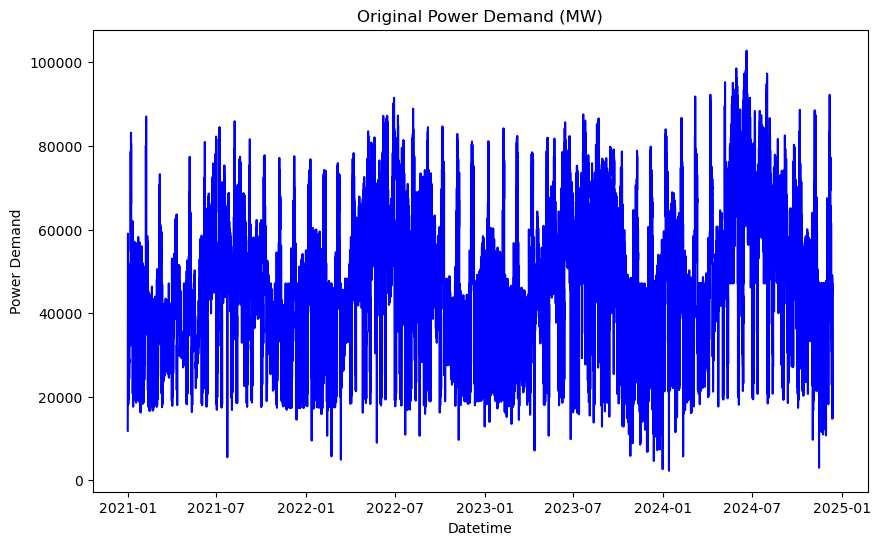

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Power demand'], color='blue')
plt.title('Original Power Demand (MW)')
plt.xlabel('Datetime')
plt.ylabel('Power Demand')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Power demand','temp','moving_avg_3h']] = scaler.fit_transform(df[['Power demand','temp','moving_avg_3h']])


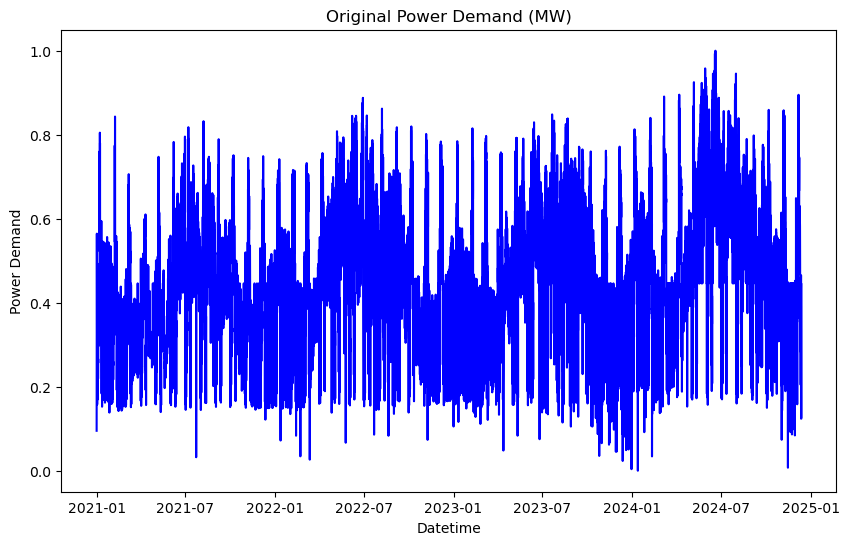

In [22]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Power demand'], color='blue')
plt.title('Original Power Demand (MW)')
plt.xlabel('Datetime')
plt.ylabel('Power Demand')
plt.show()


array([[<Axes: title={'center': 'Power demand'}>,
        <Axes: title={'center': 'temp'}>]], dtype=object)

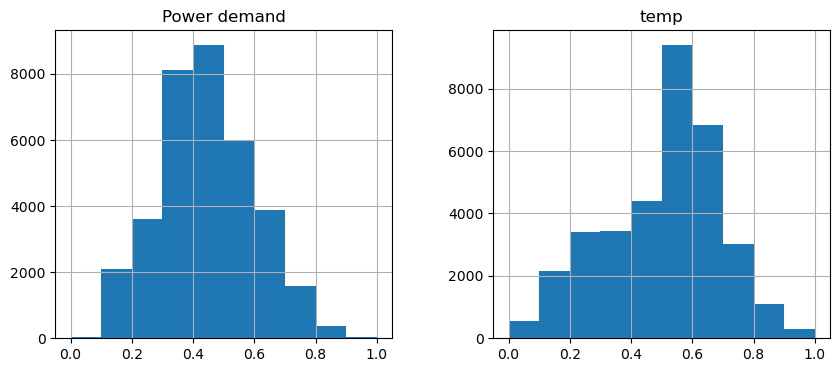

In [23]:
df[['Power demand','temp']].hist(figsize=(10,4))


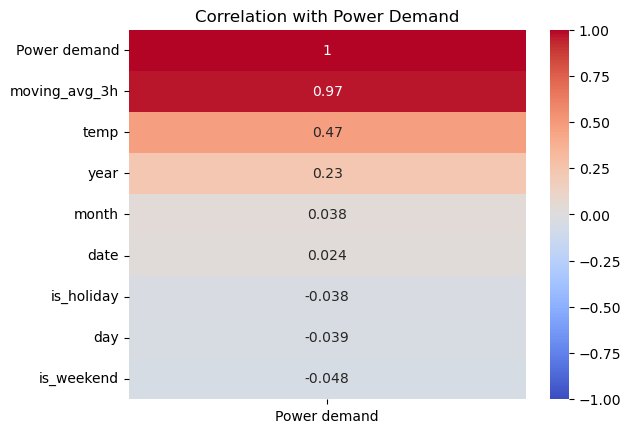

In [24]:
corr_power = df.corr()[['Power demand']].sort_values(by='Power demand', ascending=False)
sns.heatmap(corr_power, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Power Demand')
plt.show()

### Main model selection and training 

In [25]:
df['year'] =df['year'] -2020 

In [26]:
x = df.drop(columns=['Power demand'])
y = df['Power demand']
x.columns

Index(['temp', 'year', 'month', 'date', 'day', 'is_weekend', 'is_holiday',
       'moving_avg_3h'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27668, 8), (6917, 8), (27668,), (6917,))

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

# Train
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict
y_pred_lr = lr.predict(x_test)

# Accuracy
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 0.025325964936447044
R2: 0.9478084306684263


In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

print("\nDecision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))



Decision Tree:
MAE: 0.04050611096751775
R2: 0.8511068993202011


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))



Random Forest:
MAE: 0.02761093366267502
R2: 0.9383376491693184


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

lag_days = 10
for lag in range(1, lag_days + 1):
    df[f'lag_{lag}'] = df['Power demand'].shift(lag)

df = df.dropna().reset_index(drop=True)


X = df[[f'lag_{i}' for i in range(1, lag_days + 1)]]
y = df['Power demand']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test R² Score: {r2:.4f}')


Test RMSE: 0.05
Test R² Score: 0.8962


In [33]:
df.head()

,Power demand,temp,year,month,date,day,is_weekend,is_holiday,moving_avg_3h,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
0,0.563341,0.107914,1.0,1.0,1.0,4.0,0.0,0.0,0.485939,0.529921,0.480116,0.398349,0.293852,0.214649,0.177350,0.169086,0.176082,0.192763,0.095097
1,0.564429,0.182254,1.0,1.0,1.0,4.0,0.0,0.0,0.517270,0.563341,0.529921,0.480116,0.398349,0.293852,0.214649,0.177350,0.169086,0.176082,0.192763
2,0.539097,0.230216,1.0,1.0,1.0,4.0,0.0,0.0,0.520679,0.564429,0.563341,0.529921,0.480116,0.398349,0.293852,0.214649,0.177350,0.169086,0.176082
3,0.473139,0.275779,1.0,1.0,1.0,4.0,0.0,0.0,0.487160,0.539097,0.564429,0.563341,0.529921,0.480116,0.398349,0.293852,0.214649,0.177350,0.169086
4,0.431917,0.299760,1.0,1.0,1.0,4.0,0.0,0.0,0.437918,0.473139,0.539097,0.564429,0.563341,0.529921,0.480116,0.398349,0.293852,0.214649,0.177350


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis


# ==== Custom Transformer 1: DataFrame-Preserving KNN Imputer ====
class DataFrameKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, n_neighbors=5):
        self.columns = columns
        self.n_neighbors = n_neighbors
        self.imputer = None
        
    def fit(self, X, y=None):
        self.imputer = KNNImputer(n_neighbors=self.n_neighbors)
        self.imputer.fit(X[self.columns])
        return self
    
    def transform(self, X):
        X = X.copy()
        X[self.columns] = self.imputer.transform(X[self.columns])
        return X


# ==== Custom Transformer 2: Mahalanobis Outlier Handler ====
class MahalanobisOutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, feature_cols=['Power demand', 'temp'], alpha=0.001):
        self.feature_cols = feature_cols
        self.alpha = alpha
        self.mean_vec_ = None
        self.cov_inv_ = None
        
    def fit(self, X, y=None):
        features = X[self.feature_cols].values
        self.mean_vec_ = np.mean(features, axis=0)
        cov_matrix = np.cov(features.T)
        self.cov_inv_ = np.linalg.inv(cov_matrix)
        return self
    
    def transform(self, X):
        X = X.copy()
        features = X[self.feature_cols].values
        
        # Calculate Mahalanobis distances
        dists = [mahalanobis(x, self.mean_vec_, self.cov_inv_) for x in features]
        threshold = np.sqrt(chi2.ppf(1 - self.alpha, len(self.feature_cols)))
        outliers = np.array(dists) > threshold
        
        # Replace outliers with rolling mean
        X.loc[outliers, 'Power demand'] = (
            X['Power demand'].rolling(3, min_periods=1).mean()[outliers]
        )
        return X


# ==== Custom Transformer 3: DataFrame-Preserving MinMax Scaler ====
class DataFrameScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = None
        
    def fit(self, X, y=None):
        self.scaler = MinMaxScaler()
        self.scaler.fit(X[self.columns])
        return self
    
    def transform(self, X):
        X = X.copy()
        X[self.columns] = self.scaler.transform(X[self.columns])
        return X


# ==== Custom Transformer 4: Year Adjuster ====
class YearAdjuster(BaseEstimator, TransformerMixin):
    def __init__(self, year_col='year', subtract=2020):
        self.year_col = year_col
        self.subtract = subtract
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        if self.year_col in X.columns:
            X[self.year_col] = X[self.year_col] - self.subtract
        return X


# ==== Build the Pipeline ====
preprocessing_pipeline = Pipeline([
    ('imputation', DataFrameKNNImputer(
        columns=['Power demand', 'temp', 'day', 'is_weekend', 'moving_avg_3h', 'is_holiday'],
        n_neighbors=5
    )),
    ('outlier_handling', MahalanobisOutlierHandler(
        feature_cols=['Power demand', 'temp'],
        alpha=0.001
    )),
    ('scaling', DataFrameScaler(
        columns=['Power demand', 'temp', 'moving_avg_3h']
    )),
    ('year_adjustment', YearAdjuster(
        year_col='year',
        subtract=2020
    ))
])

# ==== Apply the Pipeline ====
df_processed_pipeline = preprocessing_pipeline.fit_transform(df.copy())

print("\n✅ Pipeline Processing Complete!")
print(f"Shape: {df_processed_pipeline.shape}")
print(f"\nFirst 5 rows:")
print(df_processed_pipeline.head())
print(f"\nColumns: {df_processed_pipeline.columns.tolist()}")
print(f"\nData types:\n{df_processed_pipeline.dtypes}")



✅ Pipeline Processing Complete!
Shape: (34575, 19)

First 5 rows:
   Power demand      temp    year  month  date  day  is_weekend  is_holiday  \
0      0.563341  0.107914 -2019.0    1.0   1.0  4.0         0.0         0.0   
1      0.564429  0.182254 -2019.0    1.0   1.0  4.0         0.0         0.0   
2      0.539097  0.230216 -2019.0    1.0   1.0  4.0         0.0         0.0   
3      0.473139  0.275779 -2019.0    1.0   1.0  4.0         0.0         0.0   
4      0.431917  0.299760 -2019.0    1.0   1.0  4.0         0.0         0.0   

   moving_avg_3h     lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
0       0.485939  0.529921  0.480116  0.398349  0.293852  0.214649  0.177350   
1       0.517270  0.563341  0.529921  0.480116  0.398349  0.293852  0.214649   
2       0.520679  0.564429  0.563341  0.529921  0.480116  0.398349  0.293852   
3       0.487160  0.539097  0.564429  0.563341  0.529921  0.480116  0.398349   
4       0.437918  0.473139  0.539097  0.564429  0.563341  

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
